### Author : Pradeep Panchariya
### Email : Panchariya11@gmail.com

## This project is based on Netflix personal data, so here we will figure out the following:
### 1. Calculate the total watch time ( In days) for one particular series.
### 2. Find out which day spends more time watching this show.
### 3. Find out when (24 hour format) you spend the most time watching this show.

#### Importing pandas library

In [1]:
import pandas as pd

In [2]:
netflix_data = pd.read_csv('ViewingActivity-sample.csv')

In [3]:
netflix_data.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


### Removing unwanted columns - [Attributes, Supplemental Video Type, Device Type, Bookmark, Latest Bookmark, Country]

In [4]:
netflix_data = netflix_data[['Profile Name','Start Time','Duration','Title','Country']]

In [5]:
netflix_data

,Profile Name,Start Time,Duration,Title,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,The Invisible War,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,The Invisible War,US (United States)
5,Charlie,2013-03-19 22:34:08,0:22:29,Star Trek: Deep Space Nine: Season 5: Children...,US (United States)
6,Charlie,2013-03-19 5:07:46,0:33:10,Star Trek: Deep Space Nine: Season 5: Soldiers...,US (United States)
7,Charlie,2013-03-18 23:57:53,0:11:36,Star Trek: Deep Space Nine: Season 5: Soldiers...,US (United States)
8,Charlie,2013-03-18 23:26:15,0:31:32,Star Trek: Deep Space Nine: Season 5: Ferengi ...,US (United States)
9,Charlie,2013-03-18 23:25:36,0:00:02,The Office (U.S.): Season 5: The Duel (Episode...,US (United States)


In [11]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Profile Name    200 non-null object
Start Time      200 non-null datetime64[ns]
Duration        200 non-null timedelta64[ns]
Title           200 non-null object
Country         200 non-null object
dtypes: datetime64[ns](1), object(3), timedelta64[ns](1)
memory usage: 7.9+ KB


### First convert start time into date object

In [12]:
netflix_data['Start Time'] = pd.to_datetime(netflix_data['Start Time'])

In [13]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Profile Name    200 non-null object
Start Time      200 non-null datetime64[ns]
Duration        200 non-null timedelta64[ns]
Title           200 non-null object
Country         200 non-null object
dtypes: datetime64[ns](1), object(3), timedelta64[ns](1)
memory usage: 7.9+ KB


### Now we also have to convert Duration column into days

In [14]:
netflix_data['Duration'] = pd.to_timedelta(netflix_data['Duration'])

In [15]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Profile Name    200 non-null object
Start Time      200 non-null datetime64[ns]
Duration        200 non-null timedelta64[ns]
Title           200 non-null object
Country         200 non-null object
dtypes: datetime64[ns](1), object(3), timedelta64[ns](1)
memory usage: 7.9+ KB


### We would like to know data only specific series so let's choose series - Star Trek 

In [16]:
netflix_data = netflix_data.loc[netflix_data['Title'].str.contains('Star Trek',regex=False),:]

In [17]:
netflix_data
netflix_data.shape

(43, 5)

### When we start any series, we also get ads so we want to select only those duration where time is greater than 1 minutes.

In [18]:
netflix_data = netflix_data[(netflix_data['Duration']>'0 days 00:01:00')]

In [41]:
netflix_data
netflix_data.shape

(38, 8)

### Let's count how many days/hours we watched this series.

In [22]:
total_watch_time = netflix_data['Duration'].sum()

In [23]:
total_watch_time

Timedelta('0 days 20:00:57')

In [42]:
netflix_data['weekday'] = netflix_data['Start Time'].dt.weekday
netflix_data['hour'] = netflix_data['Start Time'].dt.hour

### Let's visualize and see in which days of week, we watched this series

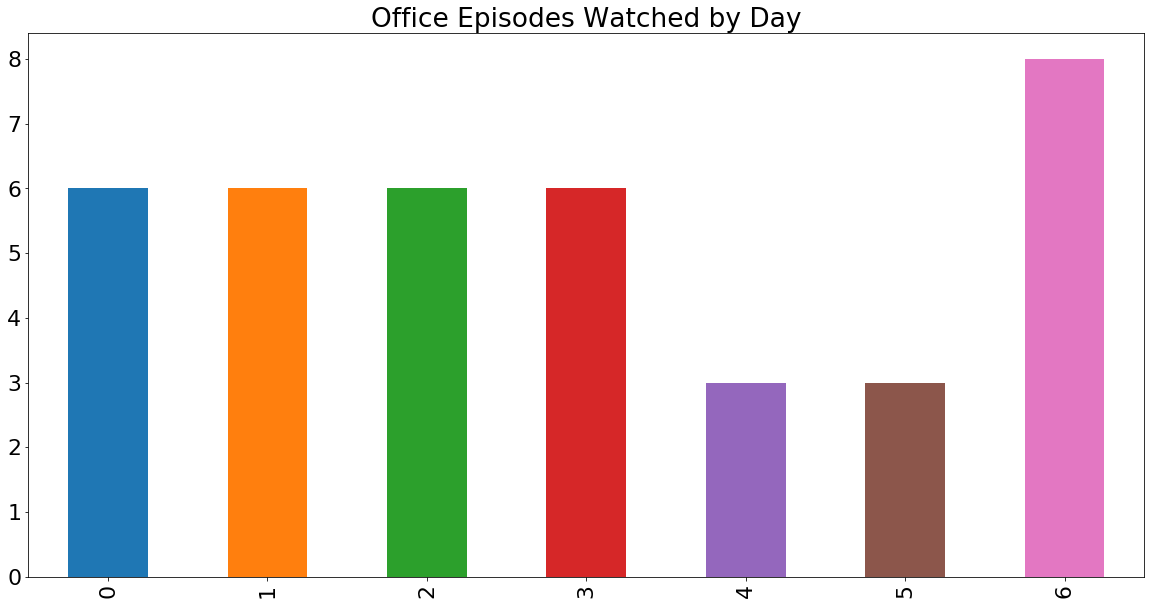

In [43]:
%matplotlib inline
import matplotlib
netflix_data['weekday'] = pd.Categorical(netflix_data['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = netflix_data['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')


### Let's visualize, 24 hours watch time

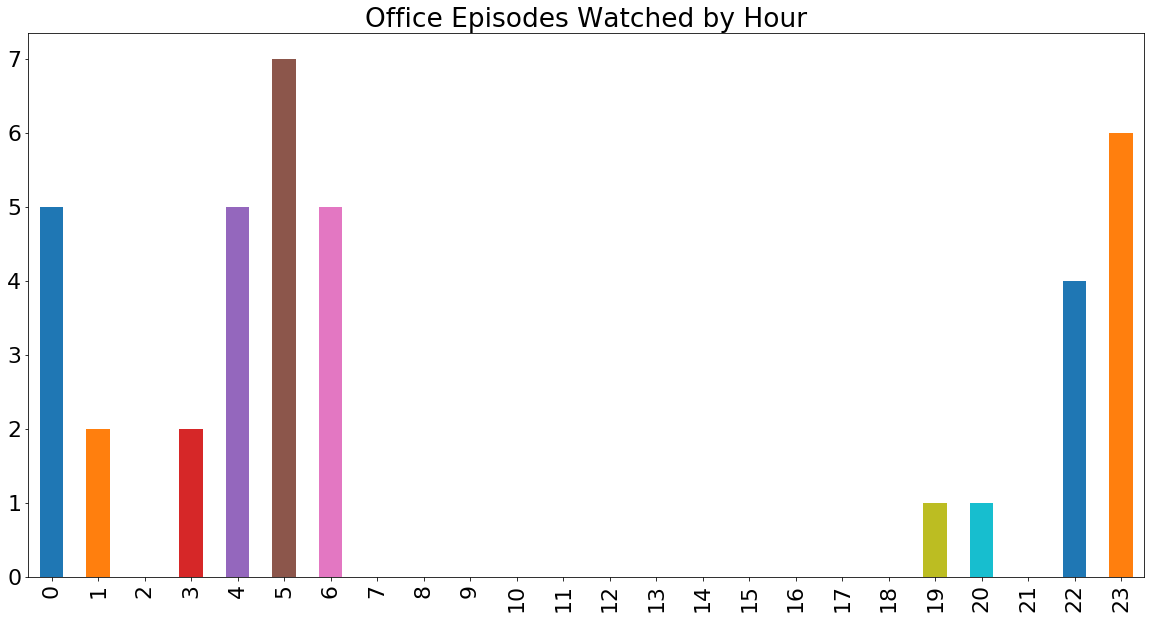

In [39]:
netflix_data['hour'] = pd.Categorical(netflix_data['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = netflix_data['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')

# So finally we completed it successfuly.